## PROBLEM STATEMENT

### IDENTIFYING "HOT LEADS"

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Once these people fill up a form providing their email address or phone number, they are classified to be a lead.

Though the company has been aquiring more leads the lead conversion rate remains low. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 





In [1]:
### Importing libraries for data handling
import pandas as pd
import numpy as np

##3 Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Libraries to customize data display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Supress warning 

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
### importing the leads dataset named Leads

leads = pd.read_csv(r"C:\Users\admin\Desktop\UPGRAD_IIIT BGLORE\Leads.csv")

### INSPECTING THE DATAFRAME

In [3]:
### first five rows
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
### NO of rows and columns
print("No of rows    : {}".format(leads.shape[0]))
print("No of columns : {}".format(leads.shape[1]))

No of rows    : 9240
No of columns : 37


In [5]:
### Dataset leads info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
### Statistical information 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## DATA CLEANING

In [7]:
#### Dropping columns "Prospect ID" and "Lead Number" as they are redundant
leads=leads.drop(["Prospect ID","Lead Number"],axis=1) 


There are some columns with category as select, which denotes that no category has been selected by the customer indicating a missing value.
These records need to be converted to NaN for proper data treatment.

In [8]:
### Extracting columns having category as select
col_select=[]
for i in leads:
    if "Select" in leads[i].value_counts() or "select" in leads[i].value_counts():
        print("{}\n{}".format(i,leads[i].value_counts()))
        print("\n")
        col_select.append(i)
print(col_select)

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool    

#### OBSERVATION: 
As seen from the extracted list the columns "Specialization", 'How did you hear about X Education','Lead Profile', 'City' have 1942,5043,4146,3222 records with select respectively 

In [9]:
### Replacing all the values with select to NaN
leads=leads.replace("Select",np.NaN)

### Dealing with Missing Values,Data types and Duplicates

In [10]:
### Null values count and percentage after replacing select with NaN
null_values=pd.DataFrame(leads.isna().sum(),columns=["Null Count"])
null_values["Null Percentage"]= round( (null_values["Null Count"]*100/leads.shape[0]), 2)
null_values.sort_values("Null Percentage",ascending=False)

,Null Count,Null Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [11]:
### Dropping the columns "How did you hear about X Education" and "Lead Profile" as more than 70% data is missing 
leads.drop(["How did you hear about X Education","Lead Profile"],axis=1,inplace=True)

## Columns check after dropping
len(leads.columns)

33

In [12]:
### Categorizing missing values of column "Lead Quality" as "Missing" 
leads["Lead Quality"].fillna("Missing",inplace=True)

## Check for missing values after imputaion
leads["Lead Quality"].isna().sum()

0

In [13]:
### The columns 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 
### 'Asymmetrique Profile Score' have same number of missing values in same records.
test=leads[leads['Asymmetrique Activity Index'].isna()][['Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                                                  'Asymmetrique Activity Score', 'Asymmetrique Profile Score']]
print(test.shape)

### Dopping these columns as the nan % is high at 45

leads.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 
            'Asymmetrique Profile Score'],axis=1, inplace=True)

## Recheck number of columns after dropping
len(leads.columns)

(4218, 4)


29

In [14]:
### imputing the nan values in "Country" with mode i.e "India"(most data pertains to India)
leads["Country"].fillna("India",inplace=True)

#### Check for missing values after imputaion
leads["Country"].isna().sum()

0

In [15]:
#### As most of the data pertains to city Mumbai and country India so imputing the city with mode "Mumbai"
#### whereever the country is India else imputing with "Other Cities"
for i in leads.index:
    if (pd.isnull(leads.loc[i,"City"])==True) & (leads.loc[i,"Country"]=="India"):
        leads.loc[i,"City"]= "Mumbai"
    elif (pd.isnull(leads.loc[i,"City"])==True) & (leads.loc[i,"Country"]!="India"):
        leads.loc[i,"City"]= "Other Cities"
    else:
        continue
        
### Value count check
leads["City"].value_counts(dropna=False)

Mumbai                         6831
Thane & Outskirts               752
Other Cities                    746
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
### Merging Tier II cities and other cities as "other cties" for a better analysis

leads["City"].replace("Tier II Cities","Other Cities",inplace=True)

## Merging "Thane & Outskirts" and "Other Cities of Maharashtra" as one category "Other Cities of Maharashtra"
leads["City"].replace("Thane & Outskirts","Other Cities of Maharashtra",inplace=True)

## Check Values after merging
leads["City"].value_counts()

Mumbai                         6831
Other Cities of Maharashtra    1209
Other Cities                    820
Other Metro Cities              380
Name: City, dtype: int64

In [17]:
### Checking the value counts of column Country
print(leads["Country"].value_counts())

#### As most of the data in Country pertains to India and all other categories with negligible values so dropping it. 
leads.drop("Country",axis=1,inplace=True)

## Number of remaining columns after drop
len(leads.columns)


India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Ghana                      2
Belgium                    2
Italy                      2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Philippines                2
China                      2
Uganda                     2
Indonesia                  1
Denmark                    1
Russia                     1
Liberia                    1
Tanzania                   1
Vietnam                    1
Malaysia      

28

In [18]:
### Imputing nan values in column "Specialization" as "Not Specified" as the column provides useful information about
### customer's domain experiance

leads["Specialization"].fillna("Not Specified",inplace=True)

### Check for missing values after imputaion
leads["Specialization"].isna().sum()

0

Ctaegorizing the missing values in Tags column to "Missing" and merging similar catagories.


In [19]:
### imputing the missing values in "Tags " column to "missing"
leads["Tags"].fillna("missing",inplace=True)

### missing value check after imputation
leads.Tags.isna().sum()

0

In [20]:
### converting the categories "invalid number" and "wrong number given" to "number not provided" as they mean the same

leads["Tags"].replace("invalid number","number not provided",inplace=True)
leads["Tags"].replace("wrong number given","number not provided",inplace=True)

#### converting the category "Shall take in the next coming month" to "Interested in Next batch"
leads["Tags"].replace("Shall take in the next coming month","Interested in Next batch",inplace=True)

### Merging the categories "Already a student","Lateral student","Graduation in progress" as "Already a student"
leads["Tags"].replace("Lateral student","Already a student",inplace=True)
leads["Tags"].replace("Graduation in progress","Already a student",inplace=True)

### Merging the categories switched off,Busy,opp hangup as "Not Reachable"
leads["Tags"].replace("switched off","Not Reachable",inplace=True)
leads["Tags"].replace("Busy","Not Reachable",inplace=True)
leads["Tags"].replace("opp hangup","Not Reachable",inplace=True)

### Merging the categories Still Thinking,In confusion whether part time or DLP as "Still Thinking"
leads["Tags"].replace("In confusion whether part time or DLP","Still Thinking",inplace=True)

### Merging the categories "Lost to EINS","in touch with EINS","Lost to Others" as "Lost to EINS/Others"
leads["Tags"].replace("Lost to EINS","Lost to EINS/Others",inplace=True)
leads["Tags"].replace("in touch with EINS","Lost to EINS/Others",inplace=True)
leads["Tags"].replace("Lost to Others","Lost to EINS/Others",inplace=True)

### merging the categories "University not recognized","Recognition issue (DEC approval)" as "Recognition Issue"
leads["Tags"].replace("University not recognized","Recognition Issue",inplace=True)
leads["Tags"].replace("Recognition issue (DEC approval)","Recognition Issue",inplace=True)

### Merging categories "Interested in other courses" and "Interested  in full time MBA" 
### as "Interested in full time MBA/other courses"
leads["Tags"].replace("Interested in other courses","Interested in full time MBA/other courses",inplace=True)
leads["Tags"].replace("Interested  in full time MBA","Interested in full time MBA/other courses",inplace=True)

### value checks
leads["Tags"].value_counts(dropna=False)

missing                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in full time MBA/other courses             630
Already a student                                     579
Not Reachable                                         459
Closed by Horizzon                                    358
Lost to EINS/Others                                   194
number not provided                                   157
Not doing further education                           145
Diploma holder (Not Eligible)                          63
Still Thinking                                         11
Interested in Next batch                                7
Want to take admission but has financial problems       6
Recognition Issue                                       3
Name: Tags, dtype: int64

In [21]:
### imputing the missing values in "What matters most to you in choosing a course" with mode "Better Career Prospects"

leads["What matters most to you in choosing a course"].fillna(leads["What matters most to you in choosing a course"].mode()[0],inplace =True)

## Missing values check after imputation
leads["What matters most to you in choosing a course"].isna().sum()

0

Categorizing missing values in Column "What is your current occupation" as "not provided".
There are some categories with very low records ,Merging them as single category for better Analysis

In [22]:
### categorizing the missing values in "What is your current occupation" as "not provided"

leads["What is your current occupation"].fillna("not provided", inplace=True)

### missing values check after imputaion
leads["What is your current occupation"].isna().sum()

0

In [23]:
### Merging the categories "Other","Housewife","Businessman" as "Other\Housewife\Businessman"
leads["What is your current occupation"].replace("Other","Other\Housewife\Businessman",inplace=True)
leads["What is your current occupation"].replace("Housewife","Other\Housewife\Businessman",inplace=True)
leads["What is your current occupation"].replace("Businessman","Other\Housewife\Businessman",inplace=True)

### Check value clunts
leads["What is your current occupation"].value_counts()


Unemployed                     5600
not provided                   2690
Working Professional            706
Student                         210
Other\Housewife\Businessman      34
Name: What is your current occupation, dtype: int64

In [24]:
#### imputing missing value of column "Page Views Per Visit" with median due to presence of outliers

leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean(),inplace=True)

## missing value check after imputaion
leads['Page Views Per Visit'].isna().sum()

0

In [25]:
### Change datatype to "int" and impute missing values with median in "TotalVisits"

leads["TotalVisits"]=leads["TotalVisits"].fillna(leads["TotalVisits"].median()).astype(int)

## missing values and data type recheck after imputaion and conversion
print(leads["TotalVisits"].isna().sum())
print(leads["TotalVisits"].dtype)

0
int32


In [26]:
### imputing missing values with mode in column "Last Activity"
leads["Last Activity"].fillna(leads["Last Activity"].mode()[0],inplace=True)

### Missing values check after imputation
leads["Last Activity"].isna().sum()

0

Imputing missing values of column "Lead Source" with mode of data.
Merging caterogories with very low records for a better analysis

In [27]:
### imputing nan values in column "Lead Source" with mode 
leads["Lead Source"].fillna(leads["Lead Source"].mode()[0],inplace=True)

### null values recheck

print(leads["Lead Source"].isna().sum())

## There are many columns like "bing","Click2call","Press_Release","Social Media","Live Chat","WeLearn","testone","welearnblog_Home"
##  "blog","youtubechannel","Pay per Click Ads","NC_EDM" with negligible data points when compared to the entire data ,
## So categorizing these columns as "Others"

merge_col=["bing","Click2call","Press_Release","Social Media","Live Chat","WeLearn","testone","welearnblog_Home",
           "blog","youtubechannel","Pay per Click Ads","NC_EDM"]
leads["Lead Source"]=leads["Lead Source"].apply(lambda x : "Others" if x in merge_col else x)

## Value counts after merging
leads["Lead Source"].value_counts()

0


Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
google                 5
Name: Lead Source, dtype: int64

#### Duplicates Check In Categorical Columns

In [28]:
#Get all the Object data type columns and thier unique values to identify if there are any duplicates
obj_cols=[col for col in leads.columns if leads[col].dtypes=='O']
for col in obj_cols:
    print(col,":\n",leads[col].unique(),"\n")

Lead Origin :
 ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

Lead Source :
 ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'Others'] 

Do Not Email :
 ['No' 'Yes'] 

Do Not Call :
 ['No' 'Yes'] 

Last Activity :
 ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked'
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam'] 

Specialization :
 ['Not Specified' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COM

There are some duplicates in column Lead Souce  like google-Google, Reference-Referral Sites which needs to be handled.


In [29]:
## Replacing "google" with "Google" in column Lead Source
## Replacing "Referral Sites" with "Reference" in column Lead Source
leads["Lead Source"].replace("google","Google",inplace=True)
leads["Lead Source"].replace("Referral Sites","Reference",inplace=True)

leads["Lead Source"].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            659
Welingak Website     142
Facebook              55
Others                23
Name: Lead Source, dtype: int64

### Dropping Redundant Columns
The columns Do Not Call , Do Not Email,Search , magazine , Newspaper Article, X Education Forums, Digital Advertisement, Newspaper, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque have either one single category or almost all the data pertaining to a single category.So these will be redundant in our analysis ,hence dropping the above columns.

In [30]:
### Dropping Do Not Call , Do Not Email,Search , magazine , Newspaper Article, X Education Forums, Digital Advertisement, Newspaper, 
### Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, 
### Get updates on DM Content, I agree to pay the amount through cheque

cols_drop=["Do Not Call" ,"Do Not Email" ,"Search" , "Magazine" , "Newspaper Article", "X Education Forums", 
           "Digital Advertisement", "Newspaper", "Through Recommendations", "Receive More Updates About Our Courses",
           "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]
leads.drop(cols_drop,axis=1,inplace=True)

### Nu,ber of columns remaing after drop
len(leads.columns)

15

### OUTLIER TREATMENT

In [31]:
### Numerical columns summary check for any possible outliers

leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.362820
std,0.486714,4.819024,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


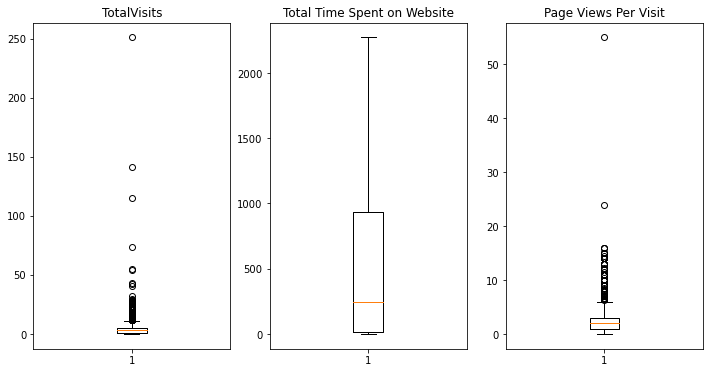

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("TotalVisits")
plt.boxplot(leads["TotalVisits"])

plt.subplot(1,3,2)
plt.title("Total Time Spent on Website")
plt.boxplot(leads["Total Time Spent on Website"])

plt.subplot(1,3,3)
plt.title("Page Views Per Visit")
plt.boxplot(leads["Page Views Per Visit"])

plt.show()

#### OBSERVATION
It is evident from the plots that "TotalVisits" and "Page Views Per Visit" have outliers which need to be handled for a proper Logistic Regression model.
In both cases outliers lie in the upper limit and in order to preserve data imputing these otliers with 99 percentile value for better analysis.

In [33]:
# Imputing outliers in "TotalVisits" with 99 percentile value
cap=np.quantile(leads["TotalVisits"],0.99)
leads["TotalVisits"]=leads["TotalVisits"].apply(lambda x : x if x<= cap else cap)

leads["TotalVisits"].describe()

count    9240.000000
mean        3.327814
std         3.228466
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [34]:
# Imputing outliers in "Page Views Per Visit" with 99 percentile value
cap=np.quantile(leads["Page Views Per Visit"],0.99)
leads["Page Views Per Visit"]=leads["Page Views Per Visit"].apply(lambda x : x if x<= cap else cap)

leads["Page Views Per Visit"].describe()

count    9240.000000
mean        2.334429
std         1.970937
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

### EDA

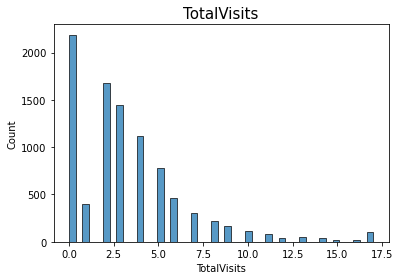

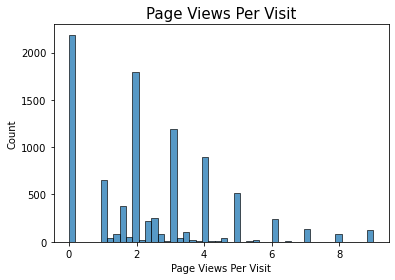

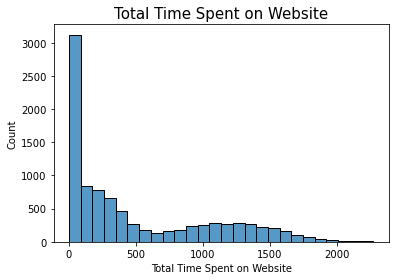

In [35]:
cols=["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
for i in cols:
    plt.title(i,fontsize=15)
    sns.histplot(leads[i])
    plt.show()

#### OBSERVATION:
Clearly from the above plots :

--Most customers are spending little time on website
--Many are not visiting the site
--Less customers are viewing website pages per visit

That explains the lead conversion rate remaining low even after Acquiring Leads



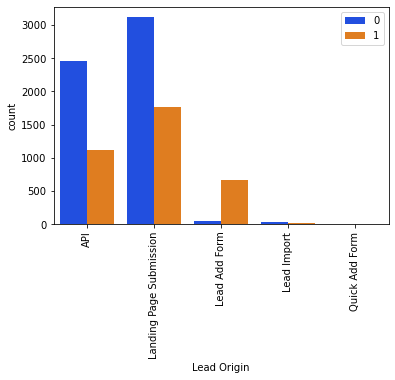

In [36]:
## Analysis on the basis of Lead orign
sns.countplot(leads['Lead Origin'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

#### OBSERVATION:
It is evident from the plot that the most customers origin is Landing Page Submission,followed by API
The lead conversion rate is much higher in "Lead Add Form" 

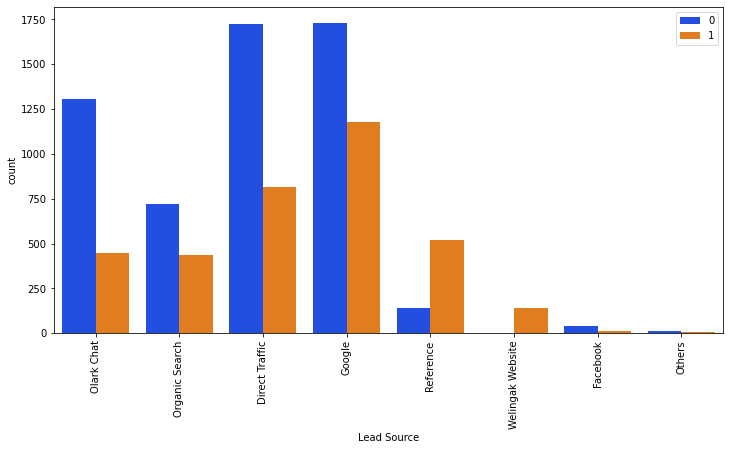

In [37]:
### Analysis on the basis of Lead Source
plt.figure(figsize=(12,6))
sns.countplot(leads['Lead Source'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

#### OBSERVATION:
1.Most of the customers are being sourced through "Direct Traffic" and "Google" where lead conversion rate is higher in customers sourced through google.
2.Lead conversion rate is highest in customers sourced through "Reference" and "Welingak Website".

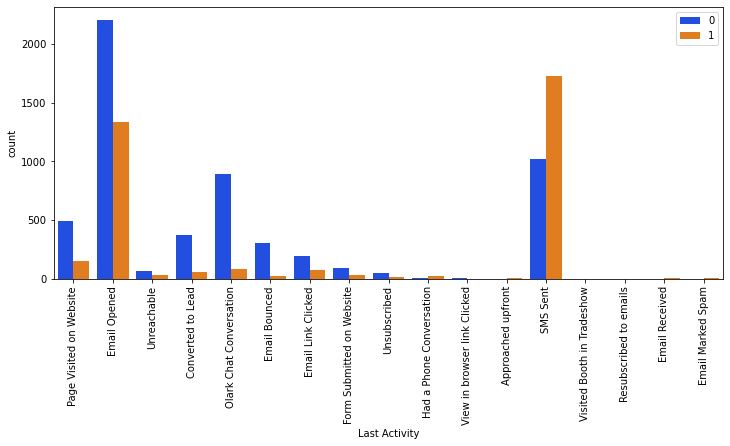

In [38]:
## Analysis on the basis of Last Activity
plt.figure(figsize=(12,5))
sns.countplot(leads['Last Activity'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

#### OBSERVATION:
Most of the customers are converting from lead after successful sms sent.Lead Conversion rate is high in customers with phone conversation.

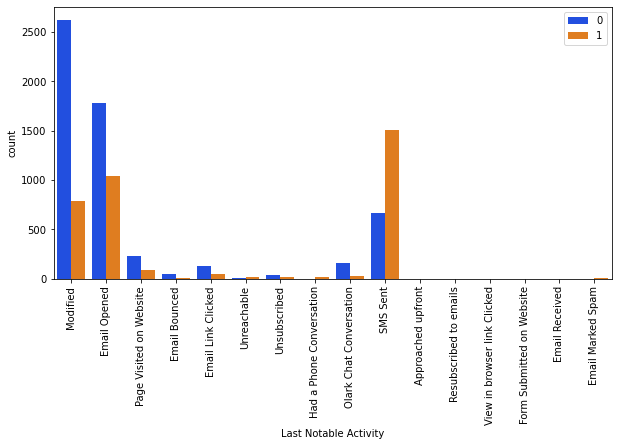

In [39]:
### Analysis on the basis of "Lead Last Activity"
plt.figure(figsize=(10,5))
sns.countplot(leads['Last Notable Activity'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

#### OBSERVATION:
As seen from the above two plots both "Last Activity and "Last notable Activity" almost contain the same categories with similar distributions.So one of the column is redundant.
Dropping "Last Noted Activity" from the dataset leads

In [40]:
# Dropping "Last Notable Activity" form the dataset leads
leads.drop(["Last Notable Activity"],axis=1,inplace =True)

## Number of final column safter dropping
len(leads.columns)

14

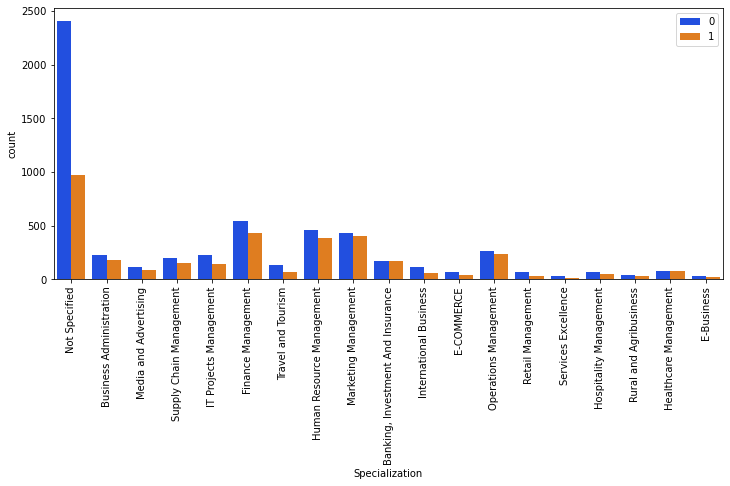

In [41]:
### Analysis on the basis of Specialization
plt.figure(figsize=(12,5))
sns.countplot(leads['Specialization'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

#### OBSERVATION:
Most of the leads have not specified there Specialization.
Among those who specified Finance Management, HR and Marketing Management seems to be the most popular Specializations.

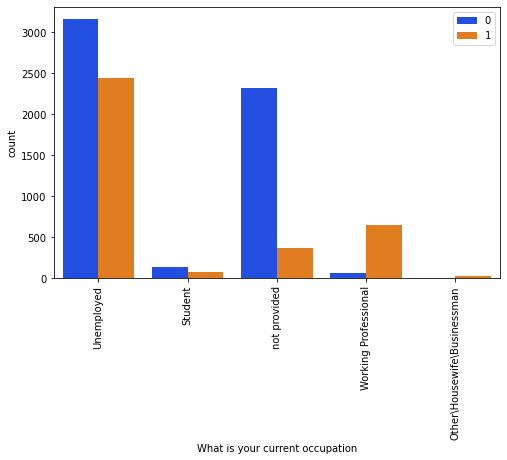

In [42]:
### Analysis on the basis of Current Occupation
plt.figure(figsize=(8,5))
sns.countplot(leads['What is your current occupation'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

#### OBSERVATION:
Most of the leads are Unemployed follwed by customers who did not provide information of employement.Among these lead conversion rate seems to be higher for Unemployed Leads.
Leads who are Working Professional seems to be most interested towards enrolling(High Conversion Rate).

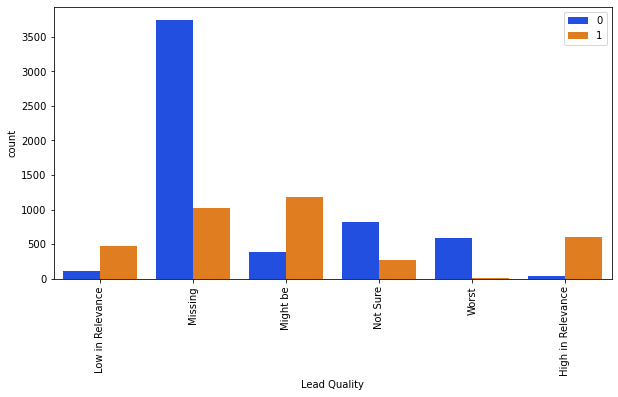

In [43]:
### Analyzing Lead Quality
plt.figure(figsize=(10,5))
sns.countplot(leads['Lead Quality'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

#### OBSERVATION:

Most of the data pertaining to lead quality seems to be missing
Among the data provided leads tagged as "Low in Relevance" , "High in Relevance" and "Might Be" seems to have a good lead conversion rate.

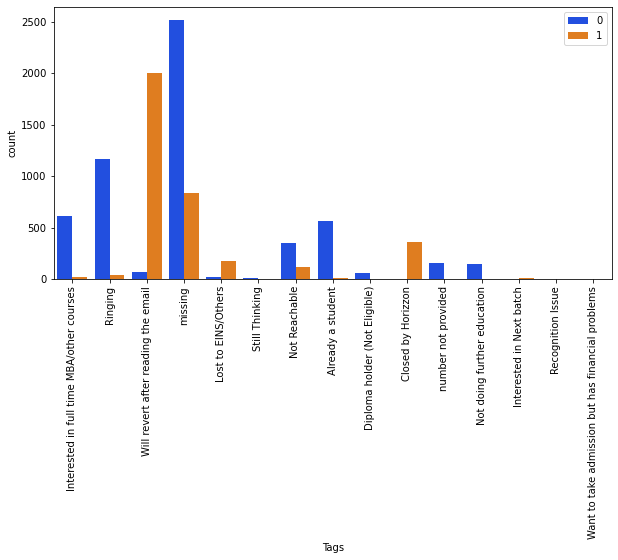

In [44]:
### 
### Analysis on the basis of Tags
plt.figure(figsize=(10,5))
sns.countplot(leads['Tags'],hue=leads["Converted"],palette="bright")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

Observation:
Customers tagged as "Will revert after reading the mail" and "closed by Horizon" seems to have the highest Lead conversion rate.

 

In [45]:
### Number of variables after Data Cleaning

len(leads.columns)

14

## DATA PREPARATION

### DUMMY VARIABLES

In [46]:
### Converting Binary categories in columns "A free copy of Mastering The Interview" "Yes" and "No" to 1 and 0 respectively

leads["A free copy of Mastering The Interview"]=leads["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

### Checking the column after conversion
leads["A free copy of Mastering The Interview"].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [47]:
## Extracting all object data type columns
obj_cols=[col for col in leads.columns if leads[col].dtypes=='O']

### Create Dummy Variables for the other categorical columns with more than two categories and store it in dataset dummies
dummies = pd.get_dummies(leads[obj_cols], drop_first = True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in Next batch,Tags_Interested in full time MBA/other courses,Tags_Lost to EINS/Others,Tags_Not Reachable,Tags_Not doing further education,Tags_Recognition Issue,Tags_Ringing,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_missing,Tags_number not provided,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Missing,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [48]:
## Adding the dummies to original data set

leads=pd.concat([leads,dummies],axis=1)

### List of colums in final dataset
print(leads.columns)

## Number of rows and columns 
leads.shape

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'City', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',

(9240, 87)

In [49]:
### Dropping the original columns as they are redundant

leads.drop(obj_cols,axis=1,inplace=True)

### Final columns check
leads.shape

(9240, 78)

### TEST TRAIN SPLIT

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Extracting all the Independent variables 
X=leads.drop(["Converted"],axis=1)
X.shape

(9240, 77)

In [52]:
### Extracting the Target or Dependant Variable
y=leads["Converted"]

y.shape

(9240,)

#### CHECKING FOR CORRELATIONS

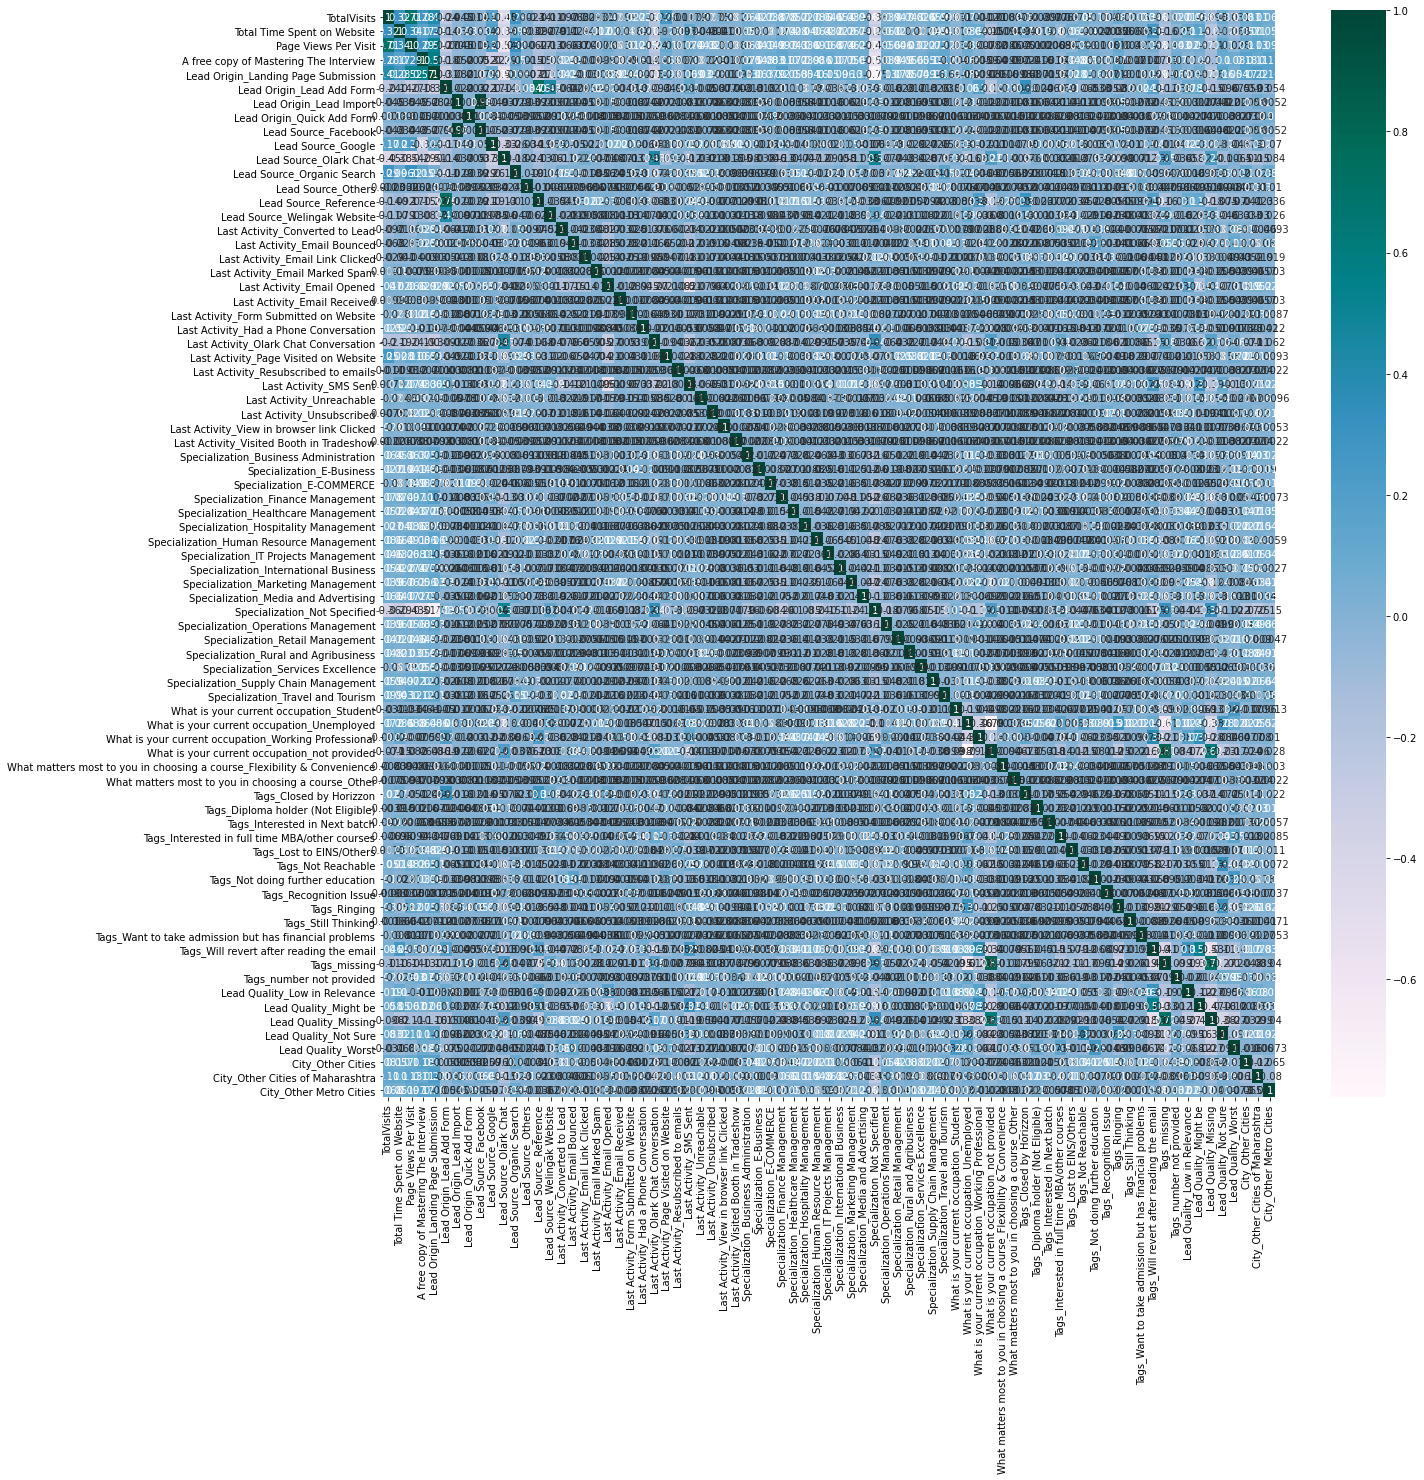

In [53]:
plt.figure(figsize = (20,20))        
sns.heatmap(X.corr(),annot=True,cmap="PuBuGn")
plt.show()

#### OBSERVATION:
Due to presence of many variables the correlation matrix heatmap is difficult to read and infer.Extracting the variables with correlations above 0.5 and below -0.5 to check the collinearity between variables and dealing with them.

In [54]:
### extracting the variables with high correlation
corr_cols=[]
df=X.corr()
for i in df.index:
    for j in df.index:
        if i!=j:
            if df.loc[i,j]>0.5 or df.loc[i,j]<(-0.5):
                corr_cols.append((i,j,df.loc[i,j]))
    else:
        continue
corr_cols

[('TotalVisits', 'Page Views Per Visit', 0.7060730918730658),
 ('Page Views Per Visit', 'TotalVisits', 0.7060730918730658),
 ('Page Views Per Visit',
  'Lead Origin_Landing Page Submission',
  0.5175753615538701),
 ('Page Views Per Visit', 'Lead Source_Olark Chat', -0.5370251223565325),
 ('A free copy of Mastering The Interview',
  'Lead Origin_Landing Page Submission',
  0.5696325148481043),
 ('A free copy of Mastering The Interview',
  'Specialization_Not Specified',
  -0.5091893243531227),
 ('Lead Origin_Landing Page Submission',
  'Page Views Per Visit',
  0.5175753615538701),
 ('Lead Origin_Landing Page Submission',
  'A free copy of Mastering The Interview',
  0.5696325148481043),
 ('Lead Origin_Landing Page Submission',
  'Lead Source_Olark Chat',
  -0.5129501687518397),
 ('Lead Origin_Landing Page Submission',
  'Specialization_Not Specified',
  -0.7482626470677463),
 ('Lead Origin_Lead Add Form', 'Lead Source_Reference', 0.758380893955066),
 ('Lead Origin_Lead Import', 'Lead S

In [55]:
## Dropping hghly correlated features
high_corr=['Page Views Per Visit','Tags_missing','What is your current occupation_not provided','Specialization_Not Specified',
           'Lead Origin_Lead Add Form','Lead Origin_Landing Page Submission',"Lead Quality_Missing",'Lead Origin_Lead Import',
           'Lead Origin_Quick Add Form']
X.drop(high_corr,axis=1,inplace=True)

len(X.columns)

68

In [56]:
### Splitting the data into Train and Test data sets

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### FEATURE SCALING

The variables "TotalVisits","Total Time Spent on Website","Page Views Per Visit" need to be standardized for a better analysis.


In [57]:
from sklearn.preprocessing import StandardScaler

In [1]:
# Standardizing the variables "TotalVisits","Total Time Spent on Website","Page Views Per Visit" using StandardScaler
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website"]] = scaler.fit_transform(
    X_train[["TotalVisits","Total Time Spent on Website"]])

X_train.head()

NameError: name 'StandardScaler' is not defined

#### Data Imbalance Check

In [59]:
### Checking the conversion rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

The conversion rate of 38.53% seems to not cause any significant performance degradation.

### MODEL BUILDING

#### Buiding First Model through Statsmodel

In [60]:
### Importing statsmodel
import statsmodels.api as sm

In [61]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1273.2
Date:                Mon, 11 Jul 2022   Deviance:                       2546.5
Time:                        22:30:36   Pearson chi2:                 1.19e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      16.4161   4.85e+04      0.000      1.000   -9.51e+04    9.51e+04
TotalVisits                                                                 0.1655      0.066      2.513      0.012       0.036       0.295
Total Time Spent on Website                                                 1.0561      0.060     17.542      0.000       0.938       1.174
A free copy of Mastering The Interview                                     -0.2004      0.171     -1.169      0.242      -0.536       0.136
Lead Source_Facebook                                                       -0.5045      0.729     -0.692      0.489      -1.933       0.924
Lead Source_Google                                                          0.2889      0.173      1.669      0.095      -0.050       0.628
Lead Source_Olark Chat                                                      1.2709      0.213      5.967      0.000       0.853       1.688
Lead Source_Organic Search                                                  0.1509      0.199      0.759      0.448      -0.239       0.541
Lead Source_Others                                                          1.0020      0.875      1.145      0.252      -0.713       2.717
Lead Source_Reference                                                       0.6879      0.304      2.263      0.024       0.092       1.284
Lead Source_Welingak Website                                                4.4647      0.766      5.827      0.000       2.963       5.966
Last Activity_Converted to Lead                                           -20.2911   4.85e+04     -0.000      1.000   -9.51e+04    9.51e+04
Last Activity_Email Bounced                                               -20.5471   4.85e+04     -0.000      1.000   -9.51e+04    9.51e+04
Last Activity_Email Link Clicked                                          -19.5412   4.85e+04     -0.000      1.000   -9.51e+04    9.51e+04
Last Activity_Email Marked Spam                                            -0.7972    1.4e+05  -5.71e-06      1.000   -2.74e+05    2.74e+05
Last Activity_Email Opened                                                -18.9414   4.85e+04     -0.000      1.000   -9.51e+04    9.51e+04
Last Activity_Email Received                                                1.1807   1.05e+05   1.13e-05      1.000   -2.05e+05    2.05e+05
Last Activity_Form Submitted on Website                                   -19.2193   4.85e+04     -0.000      1.000   -9.51e+04    9.51e+04
Last Activity_Had a Phone Conversation                                    -18.9983   4.85e+04     -0.000      1.000   -9.51e+04    9.51e+04
Las

### OBSERVATION:
As can be observed there are many insignificant variables with high pvalues.
Also the standard error of many variables are very high compared to their coefficients indicating multicollinearity.Hence remodeled using RFE for better model performance.

### Feature Selection Through RFE:
As there are many independent features , in order to avoid overfitting best features selection through RFE 

In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [63]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [64]:
### feature Ranking as per RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 11),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 24),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 4),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Marked Spam', False, 56),
 ('Last Activity_Email Opened', False, 18),
 ('Last Activity_Email Received', False, 48),
 ('Last Activity_Form Submitted on Website', False, 49),
 ('Last Activity_Had a Phone Conversation', False, 28),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Page Visited on Website', False, 23),
 ('Last Activity_Resubscribed to emails', False, 26),
 ('Last Activity_SMS Sent', True, 1)

In [65]:
### The top 12 features as per RFE
    col = X_train.columns[rfe.support_]
    col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in full time MBA/other courses',
       'Tags_Lost to EINS/Others', 'Tags_Not doing further education',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_number not provided', 'Lead Quality_Worst'],
      dtype='object')

### Assessing the model using Statsmodels

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1681.4
Date:                Mon, 11 Jul 2022   Deviance:                       3362.7
Time:                        22:30:41   Pearson chi2:                 8.17e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0019      0.066    -30.497      0.000      -2.131      -1.873
Lead Source_Welingak Website                             4.6577      0.729      6.390      0.000       3.229       6.086
Last Activity_SMS Sent                                   2.0060      0.095     21.179      0.000       1.820       2.192
What is your current occupation_Working Professional     0.5810      0.323      1.800      0.072      -0.052       1.214
Tags_Closed by Horizzon                                  7.2536      1.006      7.212      0.000       5.282       9.225
Tags_Diploma holder (Not Eligible)                     -22.3017   1.81e+04     -0.001      0.999   -3.55e+04    3.55e+04
Tags_Interested in full time MBA/other courses          -1.6565      0.293     -5.663      0.000      -2.230      -1.083
Tags_Lost to EINS/Others                                 3.9943      0.301     13.265      0.000       3.404       4.584
Tags_Not doing further education                        -2.3451      1.022     -2.295      0.022      -4.348      -0.343
Tags_Ringing                                            -2.6820      0.214    -12.524      0.000      -3.102      -2.262
Tags_Will revert after reading the email                 4.7027      0.171     27.437      0.000       4.367       5.039
Tags_number not provided                                -3.6937      1.011     -3.652      0.000      -5.676      -1.711
Lead Quality_Worst                                      -2.1672      0.403     -5.383      0.000      -2.956      -1.378
========================================================================================================================
"""

#### OBSERVATION:
THe features Tags_Diploma holder (Not Eligible) and What is your current occupation_Working Professional have high p values of 0.999 and 0.072 respectively, So remodelling after dropping Tags_Diploma holder (Not Eligible)

In [67]:
# Remodel after removing "Tags_Diploma holder (Not Eligible)" due to very  high p value of 0.999
X_train_sm = sm.add_constant(X_train_sm.drop(["Tags_Diploma holder (Not Eligible)"],axis=1))
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1686.2
Date:                Mon, 11 Jul 2022   Deviance:                       3372.4
Time:                        22:30:41   Pearson chi2:                 8.27e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0175      0.066    -30.766      0.000      -2.146      -1.889
Lead Source_Welingak Website                             4.6707      0.729      6.407      0.000       3.242       6.100
Last Activity_SMS Sent                                   2.0178      0.095     21.316      0.000       1.832       2.203
What is your current occupation_Working Professional     0.5783      0.322      1.794      0.073      -0.053       1.210
Tags_Closed by Horizzon                                  7.2697      1.006      7.228      0.000       5.298       9.241
Tags_Interested in full time MBA/other courses          -1.6426      0.293     -5.614      0.000      -2.216      -1.069
Tags_Lost to EINS/Others                                 4.0159      0.302     13.311      0.000       3.425       4.607
Tags_Not doing further education                        -2.3284      1.022     -2.278      0.023      -4.331      -0.325
Tags_Ringing                                            -2.6757      0.214    -12.492      0.000      -3.095      -2.256
Tags_Will revert after reading the email                 4.7175      0.171     27.521      0.000       4.381       5.053
Tags_number not provided                                -3.6859      1.012     -3.644      0.000      -5.669      -1.703
Lead Quality_Worst                                      -2.2136      0.400     -5.532      0.000      -2.998      -1.429
========================================================================================================================
"""

#### OBSERVATION:
The model still shows high p value for the feature What is your current occupation_Working Professional as 0.073 ,So remodel after dropping it.

In [68]:
### Remodel after dropping "What is your current occupation_Working Professional"
X_train_sm = sm.add_constant(X_train_sm.drop(["What is your current occupation_Working Professional"],axis=1))
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.9
Date:                Mon, 11 Jul 2022   Deviance:                       3375.8
Time:                        22:31:29   Pearson chi2:                 8.45e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0142      0.066    -30.740      0.000      -2.143      -1.886
Lead Source_Welingak Website                       4.6673      0.729      6.402      0.000       3.239       6.096
Last Activity_SMS Sent                             2.0172      0.095     21.326      0.000       1.832       2.203
Tags_Closed by Horizzon                            7.3889      1.004      7.357      0.000       5.420       9.357
Tags_Interested in full time MBA/other courses    -1.6172      0.292     -5.540      0.000      -2.189      -1.045
Tags_Lost to EINS/Others                           4.0414      0.301     13.427      0.000       3.451       4.631
Tags_Not doing further education                  -2.3305      1.022     -2.280      0.023      -4.334      -0.327
Tags_Ringing                                      -2.6742      0.214    -12.487      0.000      -3.094      -2.254
Tags_Will revert after reading the email           4.8312      0.164     29.507      0.000       4.510       5.152
Tags_number not provided                          -3.6886      1.012     -3.646      0.000      -5.671      -1.706
Lead Quality_Worst                                -2.2231      0.402     -5.531      0.000      -3.011      -1.435
==================================================================================================================
"""

#### OBSERVATION:

All the features of the model seems to be significant.The Top 10 features are:
     
     1'Lead Source_Welingak Website',
        
     2'Last Activity_SMS Sent',
    
     3'Tags_Closed by Horizzon',
        
     4'Tags_Interested in full time MBA/other courses',
    
     5Tags_Lost to EINS/Others',
        
     6'Tags_Not doing further education',
    
     7'Tags_Ringing',
        
     8'Tags_Will revert after reading the email',
    
     9'Tags_number not provided',
        
     10'Lead Quality_Worst'
        
Customers grouped as "Tags_Closed by Horizzon" seems to have the best Lead Conversion rate.And those customers grouped as 'Tags_number not provided' a negative relation with the Target Variable Converted indicating the least Conversion rate among the top 10.

In [72]:
y_train_pred = res.predict(X_train_sm)

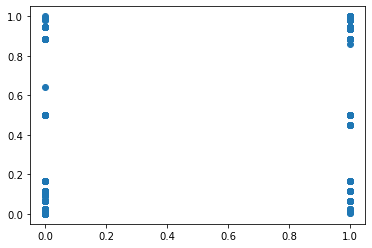

In [76]:
plt.scatter(y_train, y_train_pred)

### MODEL EVALUATION:

Evaluating the model by getting the confusion matrics and Accuracy.

Calculating the Lead Score as 1 to 100.

In [248]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
## Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.00911779, 0.11772215, 0.00911779, 0.06469771, 0.11772215,
       0.99211002, 0.00911779, 0.995389  , 0.11772215, 0.99211002])

##### Creating a dataframe with the actual Conversion flag, the predicted probabilities and Lead Score

In [249]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Conversion_Prob']=y_train_pred_final["Conversion_Prob"].apply(lambda x : round(x,2))
y_train_pred_final['Lead_Score']=y_train_pred_final["Conversion_Prob"].apply(lambda x : round(x*100,2))
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,CustID
0,0,0.01,1.0,1871
1,0,0.12,12.0,6795
2,0,0.01,1.0,3516
3,0,0.06,6.0,8105
4,0,0.12,12.0,3934


#### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [250]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# First five rows
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,CustID,predicted
0,0,0.01,1.0,1871,0
1,0,0.12,12.0,6795,0
2,0,0.01,1.0,3516,0
3,0,0.06,6.0,8105,0
4,0,0.12,12.0,3934,0


In [251]:
from sklearn import metrics

In [252]:
# Creating the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3939   63]
 [ 657 1809]]


#### OBSERVATION
As per the confusion matrix the values of :
True Negatives =3587
Fasle Negatives = 295
True Positives= 2171
False Positives= 415

In [253]:
# Checking overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8886827458256029


In [254]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [255]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.54
8,Tags_Will revert after reading the email,1.22
10,Lead Quality_Worst,1.14
7,Tags_Ringing,1.13
2,Last Activity_SMS Sent,1.12
6,Tags_Not doing further education,1.10
4,Tags_Interested in full time MBA/other courses,1.09
3,Tags_Closed by Horizzon,1.05
1,Lead Source_Welingak Website,1.02
5,Tags_Lost to EINS/Others,1.02


#### OBSERVATION:

All the variables in the final model seems to be significant with low VIF and P values.

### Other Evaluation Methods:

Apart from Simple Accuracy other methods like Specificity, Sencistivity, false postive rate, positive predictive value, Negative predictive valuegive a better model performance for different Buisiness Scenarios.
So extracting the True Positives, True Negatives, False Positives and False Negatives for calculating the above metrics.

In [256]:
### Extracting the True Positves as TP,True Negatives As TN, False Positives as FP and False Negatives as FN from Confusion matrics

TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [257]:
#  sensitivity of our logistic regression model
print("Sensitivity:\n",TP / float(TP+FN))
# specificity
print("Specificity:\n",TN / float(TN+FP))
# false postive rate - predicting churn when customer does not have churned
print("False Positive Rate:\n",FP/ float(TN+FP))
# positive predictive value 
print ("Positive Predicted Values:\n",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predicted Values:\n",TN / float(TN+ FN))

Sensitivity:
 0.7335766423357665
Specificity:
 0.9842578710644677
False Positive Rate:
 0.015742128935532233
Positive Predicted Values:
 0.9663461538461539
Negative Predicted Values:
 0.8570496083550914


### Plotting the ROC Curve

In [258]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [259]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

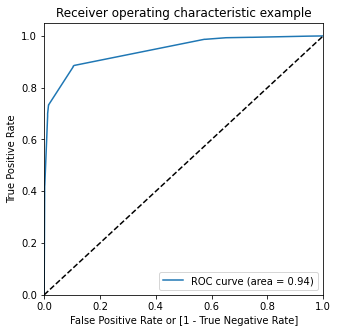

In [260]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The model seems to be fine as the curve follows the left hand border and then the top border.

### Finding Optimal Cutoff Point

Finding the best cut off where Accuracy,Specificity and Sensitivity balance.

In [261]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.01,1.0,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.12,12.0,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.01,1.0,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.06,6.0,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.12,12.0,3934,0,1,1,0,0,0,0,0,0,0,0


In [262]:
# Calculate accuracy ,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] 
    TN = cm1[0,0] 
    FP = cm1[0,1] 
    FN = cm1[1,0]
    accuracy = (TN+TP)/total1
    
    specificity = TN/(TN+FP)
    sensitivity = TP/(FN+TP)
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.415121     0.999189     0.055222
0.1   0.1  0.639920     0.987024     0.426037
0.2   0.2  0.891156     0.882806     0.896302
0.3   0.3  0.891156     0.882806     0.896302
0.4   0.4  0.891156     0.882806     0.896302
0.5   0.5  0.888683     0.733577     0.984258
0.6   0.6  0.888683     0.733577     0.984258
0.7   0.7  0.888837     0.733577     0.984508
0.8   0.8  0.888837     0.733577     0.984508
0.9   0.9  0.877860     0.699513     0.987756


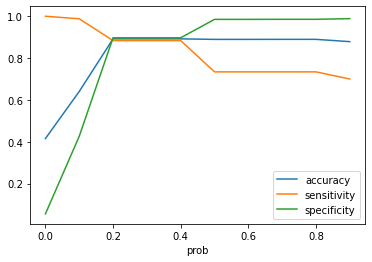

In [263]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### OBSERVATION:
For probabilities 0.2,0.3,0.4 the Accuracy ,Sensitivity and Specificity are exactly same and well balanced.So a cut-off at any of these would give the best model.

In [264]:
## Predicting the values using the cut off at 0.4
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.01,1.0,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.12,12.0,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.01,1.0,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.06,6.0,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.12,12.0,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [265]:
#  sensitivity of our logistic regression model
print("Sensitivity:\n",TP / float(TP+FN))
# specificity
print("Specificity:\n",TN / float(TN+FP))
# false postive rate - predicting churn when customer does not have churned
print("False Positive Rate:\n",FP/ float(TN+FP))
# positive predictive value 
print ("Positive Predicted Values:\n",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predicted Values:\n",TN / float(TN+ FN))

Sensitivity:
 0.6995133819951338
Specificity:
 0.9877561219390305
False Positive Rate:
 0.012243878060969516
Positive Predicted Values:
 0.9723788049605412
Negative Predicted Values:
 0.842138900724329


### Precision and Recall

In [266]:
from sklearn.metrics import precision_score, recall_score

In [267]:
### Calculating Precision
print("Precision:")
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

Precision:


0.9663461538461539

In [268]:
#### Calculating Recall
print("Recall:")
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

Recall:


0.7335766423357665

### ### Precision and recall tradeoff

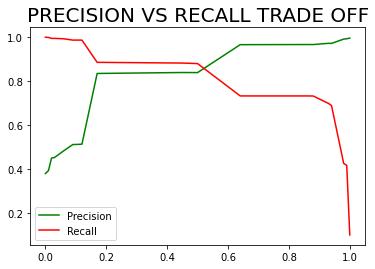

In [269]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted
### Getting the precision and recall for all the probabilities
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.title("PRECISION VS RECALL TRADE OFF",fontsize=20)
label=["Precision","Recall"]
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(label)
plt.show()

#### OBSERVATION:
Best Precision and Recall values for our model would be at a cutoff of 5.5

### Making predictions on the test set

In [270]:
## Scaling the numerical features on test set
X_test[["TotalVisits","Total Time Spent on Website"]] = scaler.fit_transform(
    X_test[["TotalVisits","Total Time Spent on Website"]])

X_test.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in Next batch,Tags_Interested in full time MBA/other courses,Tags_Lost to EINS/Others,Tags_Not Reachable,Tags_Not doing further education,Tags_Recognition Issue,Tags_Ringing,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_number not provided,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities
4269,1.481239,0.933036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,-1.050981,-0.900812,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7766,0.531657,-0.793792,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
9199,-1.050981,-0.900812,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4359,-1.050981,-0.900812,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [271]:
## Extracting the final top 10 variables in test set
final_col=X_train_sm.drop("const",axis=1).columns
X_test=X_test[final_col]
X_test.columns

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon',
       'Tags_Interested in full time MBA/other courses',
       'Tags_Lost to EINS/Others', 'Tags_Not doing further education',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_number not provided', 'Lead Quality_Worst'],
      dtype='object')

In [272]:
### Predicting probabilities on test test
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.500761
2376    0.992110
7766    0.943588
9199    0.117722
4359    0.943588
9186    0.992110
1631    0.943588
8963    0.943588
8007    0.117722
5324    0.992110
dtype: float64

In [273]:
## Converting the array y_test_pred into a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1= y_pred_1.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_1.head()

,Conversion_Prob
4269,0.500761
2376,0.992110
7766,0.943588
9199,0.117722
4359,0.943588


### Creating the Final dataframe with Lead Score

The final data frame includes the 

In [274]:
## Creating the final dataframe with Converted ,Conversion_Prob for
                      
y_test_df = pd.DataFrame(y_test)
y_test_df['CustID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
## Assigning the Lead Score
y_pred_final["Conversion_Prob"]=y_pred_final["Conversion_Prob"].apply(lambda x: round(x,2))
y_pred_final["Lead_Score"]=y_pred_final["Conversion_Prob"].apply(lambda x: round(x*100,2))
y_pred_final.head()

,Converted,CustID,Conversion_Prob,Lead_Score
0,1,4269,0.50,50.0
1,1,2376,0.99,99.0
2,1,7766,0.94,94.0
3,0,9199,0.12,12.0
4,1,4359,0.94,94.0


In [275]:
### Using the best cutoff for final predicted values
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_pred_final.head()

,Converted,CustID,Conversion_Prob,Lead_Score,final_predicted
0,1,4269,0.50,50.0,0
1,1,2376,0.99,99.0,1
2,1,7766,0.94,94.0,1
3,0,9199,0.12,12.0,0
4,1,4359,0.94,94.0,1


In [276]:
# check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8917748917748918

In [277]:
### Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1651,   26],
       [ 274,  821]], dtype=int64)

In [278]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [279]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7497716894977169

In [280]:
# calculate specificity
TN / float(TN+FP)

0.9844961240310077

#### OBSERVATION:
The cut off of 5.2 for optimal trdeoff between Precision and recall would give a model with

Accuracy    : 0.89

Sensitivity : 0.75

Specificity : 0.98

## END LOGISTIC REGRESSION